## Assignment 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

 

## Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Definition:
https://cdn.upgrad.com/UpGrad/temp/87f67e28-c47e-4725-ae3c-111142c7eaba/data_description.txt



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',100)

In [2]:
house_train = pd.read_csv(r'C:\Users\priya\Documents\ML algorithms\Advanced Regression\Assignment\train.csv')
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house_train.shape

(1460, 81)

In [4]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking nulls in Categorical columns and their treatments

In [5]:
house_train.select_dtypes('object').isnull().sum()[house_train.select_dtypes('object').isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### 
- Null in Alley means no Alley access -- No Alley
- Null in MasVnrType means None -- None
- Null in BsmtQual means no basement -- No Basement
- Null in BsmtCond means no basement -- No Basement
- Null in BsmtExposure means no basement -- No Basement
- Null in BsmtFinType1 means no basement -- No Basement
- null in BsmtFinType2 means no basement -- No Basement
- Null in Electrical means None -- None
- Null in FireplaceQu means no fireplace -- No Fireplace
- Null in GarageType means no garage -- No Garage
- Null in GarageFinish means no garage -- No Garage
- Null in GarageQual means no garage -- No Garage
- null in GarageCond means no garage -- No Garage
- Null in PoolQC means no pool -- No Pool
- Null in Fence  means no fence -- No Fence
- null in MiscFeature means none -- None

In [6]:
for col in ('MasVnrType','Electrical', 'MiscFeature'):
    house_train[col] = house_train[col].fillna('None')

house_train['Alley'].fillna('No Alley', inplace = True)
house_train['BsmtQual'].fillna('No Basement', inplace = True)
house_train['BsmtCond'].fillna('No Basement', inplace = True)
house_train['BsmtExposure'].fillna('No Basement', inplace = True)
house_train['BsmtFinType1'].fillna('No Basement', inplace = True)
house_train['BsmtFinType2'].fillna('No Basement', inplace = True)
house_train['FireplaceQu'].fillna('No Fireplace', inplace = True)
house_train['GarageType'].fillna('No Garage', inplace = True)
house_train['GarageFinish'].fillna('No Garage', inplace = True)
house_train['GarageQual'].fillna('No Garage', inplace = True)
house_train['GarageCond'].fillna('No Garage', inplace = True)
house_train['PoolQC'].fillna('No Pool', inplace = True)
house_train['Fence'].fillna('No Fence', inplace = True)

In [7]:
house_train.select_dtypes('object').isnull().sum()[house_train.select_dtypes('object').isnull().sum() > 0]

Series([], dtype: int64)

### Checking nulls in numerical columns and their treatment

In [8]:
house_train.select_dtypes(include = ['int64','float']).isnull().sum()[house_train.select_dtypes(include = ['int64','float']).isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [9]:
LotFrontage_med = house_train['LotFrontage'].median()
MasVnrArea_med = house_train['MasVnrArea'].median()
house_train['LotFrontage'].fillna(LotFrontage_med, inplace = True)
house_train['MasVnrArea'].fillna(0, inplace = True)
house_train['GarageYrBlt'].fillna(2021, inplace = True)

### Dropping Id column

In [10]:
house_train.drop('Id', axis=1, inplace=True)

### Exploratory Data Analysis

#### Exploring the target variable

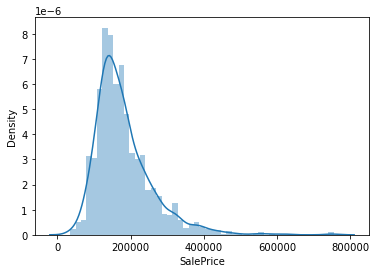

In [11]:
sns.distplot(house_train.SalePrice)
plt.show()

#### Transforming the target variable using log function as the original column is skewed

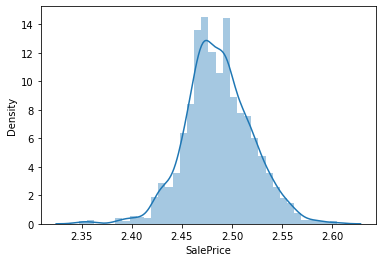

In [12]:
house_train['SalePrice'] = np.log(house_train.SalePrice)
sns.distplot(np.log(house_train.SalePrice))
plt.show()

### Correlation matrix for numerical columns

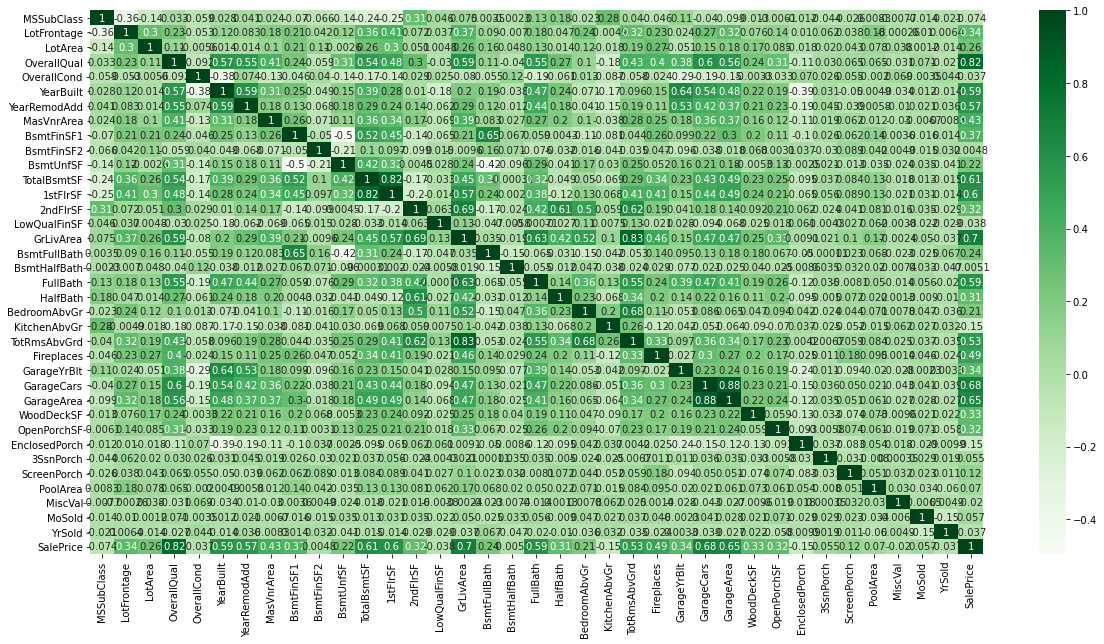

In [13]:
plt.figure(figsize = (20, 10))
sns.heatmap(house_train.corr(), annot = True, cmap="Greens")
plt.show()

### Below columns shows high relation with the target variable
- LotArea
- GrLivArea
- OverallQual
- GarageArea / GarageCars 
- 1stFlrSF / TotalBsmtSF

### Dropping GarageArea, TotRmsAbvGrd, 1stFlrSF as they are highly correlated with below features
- GarageArea, GarageCars
- GrLivArea, TotRmsAbvGrd
- 1stFlrSF, TotalBsmtSF

In [14]:
house_train.drop(['GarageArea', 'TotRmsAbvGrd', '1stFlrSF'],axis=1,inplace=True)

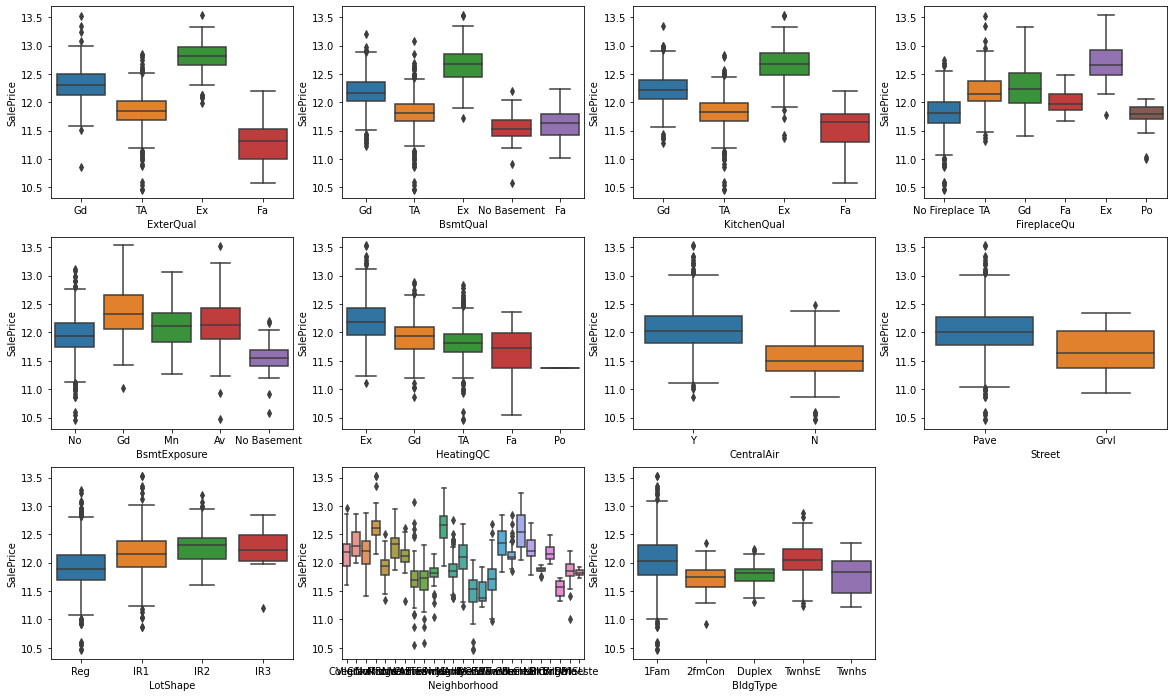

In [15]:
## Visualizing categorical data

plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house_train)
plt.subplot(3,4,2)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house_train)
plt.subplot(3,4,3)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house_train)
plt.subplot(3,4,4)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = house_train)
plt.subplot(3,4,5)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house_train)
plt.subplot(3,4,6)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house_train)
plt.subplot(3,4,7)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = house_train)
plt.subplot(3,4,8)
sns.boxplot(x = 'Street', y = 'SalePrice', data = house_train)
plt.subplot(3,4,9)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = house_train)
plt.subplot(3,4,10)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house_train)
plt.subplot(3,4,11)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house_train)
plt.show()

#### Inference from above plots
- sale price is increasing with the quality of ExterQual, BsmtQual, KitchenQual, FireplaceQu, BsmtExposure, HeatingQC, CentralAir
- sale price is more when the street is paved
- sale price has slightly decreased whe the lotshape is regular
- building type does not show a clear pattern with sale price
- 

### Transforming year columns to corresponding ages and dropping original columns

In [16]:
house_train['Build_Age'] = 2021 - house_train['YearBuilt']
house_train['Remod_Age'] = 2021 - house_train['YearRemodAdd']
house_train['Garage_Age'] = 2021 - house_train['GarageYrBlt']
house_train['Sold_Age'] = 2021 - house_train['YrSold']

house_train.drop(['YearBuilt','YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1,inplace=True)

### Encoding the columns and conversion of numerical columns to object types

In [17]:
house_train['ExterQual'] = house_train['ExterQual'].map({'Po':0,'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
house_train['BsmtQual'] = house_train['BsmtQual'].map({'No Basement':0, 'Po':0,'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
house_train['KitchenQual'] = house_train['KitchenQual'].map({'Po':0,'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
house_train['FireplaceQu'] = house_train['FireplaceQu'].map({'No Fireplace':0, 'Po':0,'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
house_train['BsmtExposure'] = house_train['BsmtExposure'].map({'No Basement':0, 'No':0,'Mn':1, 'Av':2, 'Gd':3})
house_train['HeatingQC'] = house_train['HeatingQC'].map({'Po':0,'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

### Dummy Creation

In [18]:
house_train.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterCond', 'Foundation', 'BsmtCond',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [19]:
types_train = house_train.dtypes #type of each feature in data: int, float, object
cat_train = types_train[types_train == object] #categorical values are type object

categorical_values_train = list(cat_train.index)

for i in categorical_values_train:
    feature_set = set(house_train[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house_train.loc[house_train[i] == j, i] = feature_list.index(j)
    house_train[i]=house_train[i].astype('int64')


In [20]:
house_train_final = house_train.copy(deep=True)

In [21]:
house_train_final.shape

(1460, 77)

### Model Building

#### Scaling

In [22]:
house_train.select_dtypes(include = ['int64','float']).columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',


In [23]:
house_train.select_dtypes(include = ['int64','float'])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Build_Age,Remod_Age,Garage_Age,Sold_Age
0,60,1,65.0,8450,1,1,3,0,0,0,1,12,6,5,3,4,7,5,0,0,1,3,1,196.0,3,0,1,3,1,0,6,706,0,0,150,856,4,4,0,4,854,0,1710,1,0,2,1,3,1,3,3,0,0,0,3,2,0,0,1,0,61,0,0,0,0,3,4,0,0,2,3,2,12.247694,18,18,18.0,13
1,20,1,80.0,9600,1,1,3,0,0,2,1,5,7,5,3,5,6,8,0,0,2,4,2,0.0,2,0,2,3,1,3,2,978,0,0,284,1262,4,4,0,4,0,0,1262,0,1,2,0,3,1,2,3,1,2,0,3,2,0,0,1,298,0,0,0,0,0,3,4,0,0,5,3,2,12.109011,45,45,45.0,14
2,60,1,68.0,11250,1,1,0,0,0,0,1,12,6,5,3,4,7,5,0,0,1,3,1,162.0,3,0,1,3,1,1,6,486,0,0,434,920,4,4,0,4,866,0,1786,1,0,2,1,3,1,3,3,1,2,0,3,2,0,0,1,0,42,0,0,0,0,3,4,0,0,9,3,2,12.317167,20,19,20.0,13
3,70,1,60.0,9550,1,1,0,0,0,3,1,6,6,5,3,4,7,5,0,0,0,1,2,0.0,2,0,5,2,4,0,2,216,0,0,540,756,4,3,0,4,756,0,1717,1,0,1,0,3,1,3,3,1,3,2,0,3,0,0,1,0,35,272,0,0,0,3,4,0,0,2,3,0,11.849398,106,51,23.0,15
4,60,1,84.0,14260,1,1,0,0,0,2,1,3,6,5,3,4,8,5,0,0,1,3,1,350.0,3,0,1,3,1,2,6,655,0,0,490,1145,4,4,0,4,1053,0,2198,1,0,2,1,4,1,3,3,1,2,0,3,3,0,0,1,192,84,0,0,0,0,3,4,0,0,12,3,2,12.429216,21,21,21.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,1,62.0,7917,1,1,3,0,0,0,1,20,6,5,3,4,6,5,0,0,1,3,2,0.0,2,0,1,3,1,0,0,0,0,0,953,953,4,4,0,4,694,0,1647,0,0,2,1,3,1,2,3,1,2,0,3,2,0,0,1,0,40,0,0,0,0,3,4,0,0,8,3,2,12.072541,22,21,22.0,14
1456,20,1,85.0,13175,1,1,3,0,0,0,1,0,6,5,3,5,6,6,0,0,11,13,0,119.0,2,0,2,3,1,0,2,790,1,163,589,1542,4,2,0,4,0,0,2073,1,0,2,0,3,1,2,1,2,2,0,0,2,0,0,1,349,0,0,0,0,0,3,3,0,0,2,3,2,12.254863,43,33,43.0,11
1457,70,1,66.0,9042,1,1,3,0,0,0,1,6,6,5,3,4,7,9,0,0,10,2,2,0.0,4,4,3,2,4,0,6,275,0,0,877,1152,4,4,0,4,1152,0,2340,0,0,2,0,4,1,3,3,2,3,0,3,1,0,0,1,0,60,0,0,0,0,3,2,4,2500,5,3,2,12.493130,80,15,80.0,11
1458,20,1,68.0,9717,1,1,3,0,0,0,1,11,6,5,3,5,5,6,2,0,2,4,2,0.0,2,0,2,2,1,1,6,49,1,1029,0,1078,4,3,0,0,0,0,1078,1,0,1,0,2,1,3,3,0,0,0,0,1,0,0,1,366,0,112,0,0,0,3,4,0,0,4,3,2,11.864462,71,25,71.0,11


In [24]:
cols_to_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF']
X = house_train_final.drop('SalePrice', axis=1)
y = house_train_final['SalePrice']
#scaler = StandardScaler()
#scaler.fit(X[cols_to_scale])
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.7,test_size=.3,random_state=42)

## Regularization

### Ridge

In [25]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [26]:
### Applying Ridge
ridge = Ridge()
folds = 5

model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', 
                        cv=folds, return_train_score=True, verbose=1)

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [27]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-0.10328741803080652


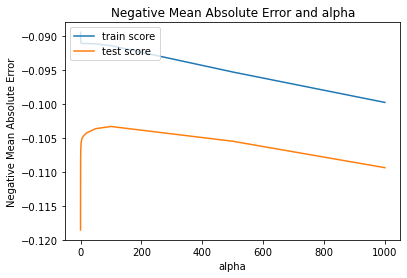

In [28]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [29]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha = 100
ridge = Ridge(alpha=alpha)        
ridge.fit(X_train, y_train) 

Ridge(alpha=100)

In [30]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_ridge_pred_train = ridge.predict(X_train)
y_ridge_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_ridge_pred_train)
print('r2 on train data : ')
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_ridge_pred_test)
print('r2 on test data : ')
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_ridge_pred_train))
print('rss on train data : ')
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_ridge_pred_test))
print('rss on test data : ')
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_ridge_pred_train)
print('mse on train data : ')
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_ridge_pred_test)
print('mse on test data : ')
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2 on train data : 
0.8798933422123738
r2 on test data : 
0.8808335486527283
rss on train data : 
19.026615998229875
rss on test data : 
8.854665582539663
mse on train data : 
0.018635275218638468
mse on test data : 
0.020216131466985532


In [31]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0009,
 'MSZoning': -0.0017,
 'LotFrontage': -0.0006,
 'LotArea': 0.0,
 'Street': 0.0002,
 'Alley': 0.018,
 'LotShape': -0.0033,
 'LandContour': -0.0091,
 'Utilities': -0.0019,
 'LotConfig': 0.005,
 'LandSlope': 0.0092,
 'Neighborhood': -0.0017,
 'Condition1': 0.0011,
 'Condition2': 0.0317,
 'BldgType': 0.0065,
 'HouseStyle': 0.0001,
 'OverallQual': 0.0629,
 'OverallCond': 0.0369,
 'RoofStyle': 0.0072,
 'RoofMatl': -0.0006,
 'Exterior1st': 0.0007,
 'Exterior2nd': 0.0001,
 'MasVnrType': -0.0022,
 'MasVnrArea': -0.0,
 'ExterQual': 0.0149,
 'ExterCond': -0.0071,
 'Foundation': -0.0127,
 'BsmtQual': 0.0369,
 'BsmtCond': -0.0013,
 'BsmtExposure': 0.0179,
 'BsmtFinType1': 0.0075,
 'BsmtFinSF1': -0.0,
 'BsmtFinType2': -0.0041,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': -0.0,
 'Heating': -0.0024,
 'HeatingQC': 0.0171,
 'CentralAir': -0.0203,
 'Electrical': 0.0007,
 '2ndFlrSF': -0.0,
 'LowQualFinSF': 0.0001,
 'GrLivArea': 0.0003,
 'BsmtFullBath': 0.0328,
 'BsmtHalf

In [32]:
# RFE to select top 25 features
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train_ridge, y_train)

In [33]:
# getting the coeff of top 25 features

def get_coeff(x):
    return ridge_coeff_dict[x]

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_)), columns=['Features', 'rfe_support'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(get_coeff)
temp1_df['abs_coeff'] = abs(temp1_df['Coefficient'])
temp1_df = temp1_df.sort_values(by=['abs_coeff'], ascending=False)
temp1_df

,Features,rfe_support,Coefficient,abs_coeff
5,OverallQual,True,0.0629,0.0629
23,GarageCars,True,0.0597,0.0597
10,BsmtQual,True,0.0369,0.0369
6,OverallCond,True,0.0369,0.0369
15,BsmtFullBath,True,0.0328,0.0328
3,Condition2,True,0.0317,0.0317
19,KitchenQual,True,0.0212,0.0212
14,CentralAir,True,-0.0203,0.0203
22,FireplaceQu,True,0.0191,0.0191
1,Alley,True,0.0180,0.0180


### Top 5 Predictors are 
- OverallQual
- GarageCars
- BsmtQual
- OverallCond
- BsmtFullBath

### Lasso

In [34]:
### Applying Lasso
lasso = Lasso()
folds = 5

model_cv_lasso = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', 
                        cv=folds, return_train_score=True, verbose=1)

model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.001}
-0.10401255842726309


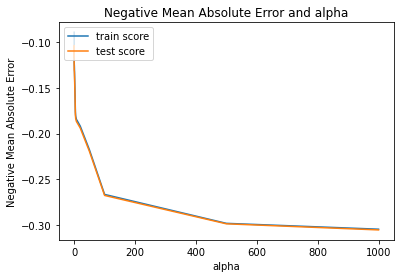

In [36]:
cv_lasso_results = pd.DataFrame(model_cv_lasso.cv_results_)

# plotting mean test and train scoes with alpha 
cv_lasso_results['param_alpha'] = cv_lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_train_score'])
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [37]:
#Fitting lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha = 0.001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [38]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_lasso_pred_train)
print('r2 on train data : ')
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_lasso_pred_test)
print('r2 on test data : ')
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_lasso_pred_train))
print('rss on train data : ')
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_lasso_pred_test))
print('rss on test data : ')
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_lasso_pred_train)
print('mse on train data : ')
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_lasso_pred_test)
print('mse on test data : ')
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 on train data : 
0.8840431113151576
r2 on test data : 
0.871960908976101
rss on train data : 
18.369233096612586
rss on test data : 
9.513947253535788
mse on train data : 
0.017991413414899692
mse on test data : 
0.021721340761497232


In [39]:
# craeting a dataframe of features and coeff

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[abs(lasso_df['Coefficient']) != 0.00]
lasso_df.reset_index(drop=True, inplace=True)

lasso_coeff_dict = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.0009,
 'MSZoning': -0.0,
 'LotFrontage': -0.0006,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 0.0341,
 'LotShape': -0.0024,
 'LandContour': -0.0073,
 'Utilities': -0.0,
 'LotConfig': 0.004,
 'LandSlope': 0.0,
 'Neighborhood': -0.0014,
 'Condition1': 0.0,
 'Condition2': 0.1009,
 'BldgType': 0.0048,
 'HouseStyle': 0.0,
 'OverallQual': 0.0685,
 'OverallCond': 0.0392,
 'RoofStyle': 0.0063,
 'RoofMatl': -0.0,
 'Exterior1st': 0.0008,
 'Exterior2nd': -0.0,
 'MasVnrType': 0.0,
 'MasVnrArea': -0.0,
 'ExterQual': 0.0136,
 'ExterCond': -0.0072,
 'Foundation': -0.0138,
 'BsmtQual': 0.0453,
 'BsmtCond': -0.0014,
 'BsmtExposure': 0.0177,
 'BsmtFinType1': 0.007,
 'BsmtFinSF1': -0.0,
 'BsmtFinType2': -0.0027,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': -0.0,
 'Heating': -0.0,
 'HeatingQC': 0.016,
 'CentralAir': -0.0379,
 'Electrical': -0.0002,
 '2ndFlrSF': -0.0001,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.0003,
 'BsmtFullBath': 0.0478,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.021

In [40]:
# RFE to select top 25 features
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train_lasso, y_train)

In [41]:
# getting the coeff of top 25 features

def get_coeff(x):
    return lasso_coeff_dict[x]

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_)), columns=['Features', 'rfe_support'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(get_coeff)
temp2_df['abs_coeff'] = abs(temp2_df['Coefficient'])
temp2_df = temp2_df.sort_values(by=['abs_coeff'], ascending=False)
temp2_df

,Features,rfe_support,Coefficient,abs_coeff
1,Condition2,True,0.1009,0.1009
21,GarageCars,True,0.0768,0.0768
3,OverallQual,True,0.0685,0.0685
13,BsmtFullBath,True,0.0478,0.0478
8,BsmtQual,True,0.0453,0.0453
4,OverallCond,True,0.0392,0.0392
11,CentralAir,True,-0.0379,0.0379
0,Alley,True,0.0341,0.0341
17,KitchenQual,True,0.0213,0.0213
14,FullBath,True,0.0212,0.0212


### Top 5 Predictors are 
- GarageCars
- OverallQual
- CentralAir
- BsmtQual
- BsmtFullBath

## Changes in the model  if the alpha values are doubled

### Ridge

In [42]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised

alpha_double = 200
ridge = Ridge(alpha=alpha_double)        
ridge.fit(X_train, y_train) 

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_ridge_pred_train_double = ridge.predict(X_train)
y_ridge_pred_test_double = ridge.predict(X_test)

In [43]:
metric2_double = []
r2_train_lr = r2_score(y_train, y_ridge_pred_train_double)
print('r2 on train data : ')
print(r2_train_lr)
metric2_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_ridge_pred_test_double)
print('r2 on test data : ')
print(r2_test_lr)
metric2_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_ridge_pred_train_double))
print('rss on train data : ')
print(rss1_lr)
metric2_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_ridge_pred_test_double))
print('rss on test data : ')
print(rss2_lr)
metric2_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_ridge_pred_train_double)
print('mse on train data : ')
print(mse_train_lr)
metric2_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_ridge_pred_test_double)
print('mse on test data : ')
print(mse_test_lr)
metric2_double.append(mse_test_lr**0.5)

r2 on train data : 
0.875279328029977
r2 on test data : 
0.8804500059839773
rss on train data : 
19.757541974157707
rss on test data : 
8.883164728314583
mse on train data : 
0.019351167457549175
mse on test data : 
0.020281198009850645


In [44]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))
ridge_coeff_dict

{'MSSubClass': -0.0009,
 'MSZoning': -0.0018,
 'LotFrontage': -0.0006,
 'LotArea': 0.0,
 'Street': 0.0001,
 'Alley': 0.0103,
 'LotShape': -0.0035,
 'LandContour': -0.0073,
 'Utilities': -0.0009,
 'LotConfig': 0.0049,
 'LandSlope': 0.0056,
 'Neighborhood': -0.0019,
 'Condition1': 0.001,
 'Condition2': 0.0184,
 'BldgType': 0.006,
 'HouseStyle': -0.0001,
 'OverallQual': 0.0577,
 'OverallCond': 0.034,
 'RoofStyle': 0.0067,
 'RoofMatl': -0.0002,
 'Exterior1st': 0.0007,
 'Exterior2nd': -0.0001,
 'MasVnrType': -0.0032,
 'MasVnrArea': -0.0,
 'ExterQual': 0.0132,
 'ExterCond': -0.0063,
 'Foundation': -0.0109,
 'BsmtQual': 0.0299,
 'BsmtCond': -0.0002,
 'BsmtExposure': 0.0173,
 'BsmtFinType1': 0.0075,
 'BsmtFinSF1': 0.0,
 'BsmtFinType2': -0.0037,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': 0.0,
 'Heating': -0.0008,
 'HeatingQC': 0.0158,
 'CentralAir': -0.0131,
 'Electrical': 0.002,
 '2ndFlrSF': -0.0,
 'LowQualFinSF': 0.0001,
 'GrLivArea': 0.0003,
 'BsmtFullBath': 0.0234,
 'BsmtHalfBa

In [45]:
# RFE to select top 25 features
X_train_ridge = X_train[ridge_df.Features]

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train_ridge, y_train)

In [46]:
# getting the coeff of top 25 features

def get_coeff(x):
    return ridge_coeff_dict[x]

temp1_df = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_)), columns=['Features', 'rfe_support'])
temp1_df = temp1_df.loc[temp1_df['rfe_support'] == True]
temp1_df.reset_index(drop=True, inplace=True)

temp1_df['Coefficient'] = temp1_df['Features'].apply(get_coeff)
temp1_df['abs_coeff'] = abs(temp1_df['Coefficient'])
temp1_df = temp1_df.sort_values(by=['abs_coeff'], ascending=False)
temp1_df

,Features,rfe_support,Coefficient,abs_coeff
5,OverallQual,True,0.0577,0.0577
23,GarageCars,True,0.0477,0.0477
6,OverallCond,True,0.0340,0.0340
10,BsmtQual,True,0.0299,0.0299
15,BsmtFullBath,True,0.0234,0.0234
22,FireplaceQu,True,0.0200,0.0200
19,KitchenQual,True,0.0191,0.0191
3,Condition2,True,0.0184,0.0184
11,BsmtExposure,True,0.0173,0.0173
13,HeatingQC,True,0.0158,0.0158


### Top 5 Predictors are 
- OverallQual
- GarageCars
- OverallCond
- BsmtQual
- BsmtFullBath

### lasso

In [47]:
#Fitting lasso model for alpha = 0.002 and printing coefficients which have been penalised

alpha = 0.002
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [48]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_lasso_pred_train)
print('r2 on train data : ')
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_lasso_pred_test)
print('r2 on test data : ')
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_lasso_pred_train))
print('rss on train data : ')
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_lasso_pred_test))
print('rss on test data : ')
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_lasso_pred_train)
print('mse on train data : ')
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_lasso_pred_test)
print('mse on test data : ')
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 on train data : 
0.8809353243237854
r2 on test data : 
0.8761560406913633
rss on train data : 
18.861551097781906
rss on test data : 
9.202227906409291
mse on train data : 
0.018473605384703138
mse on test data : 
0.021009652754359114


In [49]:
# craeting a dataframe of features and coeff

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[abs(lasso_df['Coefficient']) != 0.00]
lasso_df.reset_index(drop=True, inplace=True)

lasso_coeff_dict = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.0009,
 'MSZoning': -0.0,
 'LotFrontage': -0.0007,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 0.0136,
 'LotShape': -0.0022,
 'LandContour': -0.0051,
 'Utilities': -0.0,
 'LotConfig': 0.0037,
 'LandSlope': 0.0,
 'Neighborhood': -0.0015,
 'Condition1': 0.0,
 'Condition2': 0.0708,
 'BldgType': 0.0021,
 'HouseStyle': 0.0,
 'OverallQual': 0.0698,
 'OverallCond': 0.039,
 'RoofStyle': 0.0046,
 'RoofMatl': -0.0,
 'Exterior1st': 0.0008,
 'Exterior2nd': 0.0,
 'MasVnrType': -0.0,
 'MasVnrArea': -0.0,
 'ExterQual': 0.0062,
 'ExterCond': -0.0059,
 'Foundation': -0.0127,
 'BsmtQual': 0.0408,
 'BsmtCond': -0.0,
 'BsmtExposure': 0.0165,
 'BsmtFinType1': 0.0068,
 'BsmtFinSF1': -0.0,
 'BsmtFinType2': -0.0018,
 'BsmtFinSF2': 0.0,
 'BsmtUnfSF': -0.0,
 'TotalBsmtSF': -0.0,
 'Heating': -0.0,
 'HeatingQC': 0.0156,
 'CentralAir': -0.0193,
 'Electrical': -0.0,
 '2ndFlrSF': -0.0,
 'LowQualFinSF': 0.0,
 'GrLivArea': 0.0003,
 'BsmtFullBath': 0.0402,
 'BsmtHalfBath': 0.0,
 'FullBath': 0.0075,
 'Ha

In [50]:
# RFE to select top 25 features
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train_lasso, y_train)

In [51]:
# getting the coeff of top 25 features

def get_coeff(x):
    return lasso_coeff_dict[x]

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_)), columns=['Features', 'rfe_support'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(get_coeff)
temp2_df['abs_coeff'] = abs(temp2_df['Coefficient'])
temp2_df = temp2_df.sort_values(by=['abs_coeff'], ascending=False)
temp2_df

,Features,rfe_support,Coefficient,abs_coeff
21,GarageCars,True,0.0734,0.0734
2,Condition2,True,0.0708,0.0708
4,OverallQual,True,0.0698,0.0698
9,BsmtQual,True,0.0408,0.0408
13,BsmtFullBath,True,0.0402,0.0402
5,OverallCond,True,0.0390,0.0390
19,FireplaceQu,True,0.0212,0.0212
12,CentralAir,True,-0.0193,0.0193
17,KitchenQual,True,0.0183,0.0183
24,SaleCondition,True,0.0172,0.0172


### Top 5 Predictors are 
- GarageCars
- OverallQual
- BsmtQual
- BsmtFullBath
- OverallCond

## Building the Lasso regression model after dropping the top 5 most important predictors

In [52]:
X = house_train_final.drop(['SalePrice', 'GarageCars', 'OverallQual', 'CentralAir', 'BsmtQual', 'BsmtFullBath'], axis=1)
y = house_train_final['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=.7,test_size=.3,random_state=42)

In [53]:
### Applying Lasso
lasso = Lasso()
folds = 5

model_cv_lasso = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', 
                        cv=folds, return_train_score=True, verbose=1)

model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)
print(model_cv_lasso.best_score_)

{'alpha': 0.01}
-0.11612765931820887


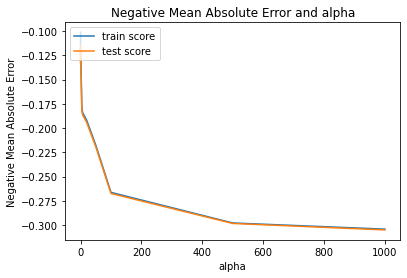

In [55]:
cv_lasso_results = pd.DataFrame(model_cv_lasso.cv_results_)

# plotting mean test and train scoes with alpha 
cv_lasso_results['param_alpha'] = cv_lasso_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_train_score'])
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [56]:
#Fitting lasso model for alpha = 0.01 and printing coefficients which have been penalised

alpha = 0.01
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [57]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_lasso_pred_train = lasso.predict(X_train)
y_lasso_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_lasso_pred_train)
print('r2 on train data : ')
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_lasso_pred_test)
print('r2 on test data : ')
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_lasso_pred_train))
print('rss on train data : ')
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_lasso_pred_test))
print('rss on test data : ')
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_lasso_pred_train)
print('mse on train data : ')
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_lasso_pred_test)
print('mse on test data : ')
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2 on train data : 
0.8296944267767802
r2 on test data : 
0.8531936963773251
rss on train data : 
26.978843669151335
rss on test data : 
10.908445366048312
mse on train data : 
0.026423940910040484
mse on test data : 
0.024905126406502994


In [58]:
# craeting a dataframe of features and coeff

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[abs(lasso_df['Coefficient']) != 0.00]
lasso_df.reset_index(drop=True, inplace=True)

lasso_coeff_dict = dict(pd.Series(lasso.coef_.round(4), index = X_train.columns))
lasso_coeff_dict

{'MSSubClass': -0.0008,
 'MSZoning': -0.0,
 'LotFrontage': -0.0004,
 'LotArea': 0.0,
 'Street': 0.0,
 'Alley': 0.0,
 'LotShape': -0.0,
 'LandContour': -0.0,
 'Utilities': -0.0,
 'LotConfig': 0.0009,
 'LandSlope': 0.0,
 'Neighborhood': -0.0029,
 'Condition1': -0.0,
 'Condition2': 0.0,
 'BldgType': 0.0,
 'HouseStyle': -0.0,
 'OverallCond': 0.0399,
 'RoofStyle': 0.0,
 'RoofMatl': 0.0,
 'Exterior1st': -0.0,
 'Exterior2nd': -0.0008,
 'MasVnrType': -0.0,
 'MasVnrArea': 0.0,
 'ExterQual': 0.0059,
 'ExterCond': -0.0,
 'Foundation': -0.0,
 'BsmtCond': 0.0,
 'BsmtExposure': 0.019,
 'BsmtFinType1': 0.0066,
 'BsmtFinSF1': 0.0001,
 'BsmtFinType2': -0.0,
 'BsmtFinSF2': 0.0001,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'Heating': -0.0,
 'HeatingQC': 0.0069,
 'Electrical': 0.0,
 '2ndFlrSF': 0.0,
 'LowQualFinSF': 0.0001,
 'GrLivArea': 0.0003,
 'BsmtHalfBath': -0.0,
 'FullBath': 0.0,
 'HalfBath': 0.0,
 'BedroomAbvGr': -0.0,
 'KitchenAbvGr': -0.0,
 'KitchenQual': 0.0353,
 'Functional': 0.0,
 'Fireplaces':

In [59]:
# RFE to select top 25 features
X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE
rfe = RFE(lm, 25)            
rfe = rfe.fit(X_train_lasso, y_train)

In [60]:
# getting the coeff of top 25 features

def get_coeff(x):
    return lasso_coeff_dict[x]

temp2_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_)), columns=['Features', 'rfe_support'])
temp2_df = temp2_df.loc[temp2_df['rfe_support'] == True]
temp2_df.reset_index(drop=True, inplace=True)

temp2_df['Coefficient'] = temp2_df['Features'].apply(get_coeff)
temp2_df['abs_coeff'] = abs(temp2_df['Coefficient'])
temp2_df = temp2_df.sort_values(by=['abs_coeff'], ascending=False)
temp2_df

,Features,rfe_support,Coefficient,abs_coeff
4,OverallCond,True,0.0399,0.0399
12,KitchenQual,True,0.0353,0.0353
13,FireplaceQu,True,0.0352,0.0352
7,BsmtExposure,True,0.0190,0.0190
14,GarageType,True,-0.0107,0.0107
21,SaleCondition,True,0.0088,0.0088
9,HeatingQC,True,0.0069,0.0069
8,BsmtFinType1,True,0.0066,0.0066
6,ExterQual,True,0.0059,0.0059
22,Build_Age,True,-0.0050,0.0050
